In [4]:
pip install pyuff

  Using cached pyuff-2.1-py3-none-any.whl (60 kB)
     |████████████████████████████████| 317 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 47.6 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyuff
import numpy as np
unv_file = pyuff.UFF('housing_40k.unv')

In [3]:
unv_file.get_set_types()

array([ 151,  164, 2411, 2412, 2414])

In [4]:
data = unv_file.read_sets()

In [8]:
data

[{'type': 151,
  'model_name': '',
  'description': 'NONE',
  'db_app': 'NONE',
  'date_db_created': '',
  'time_db_created': '',
  'version_db1': 0,
  'version_db2': 0,
  'file_type': 0,
  'date_db_saved': '',
  'time_db_saved': '',
  'program': 'VKI 453 24-Feb-23 22:10:15',
  'date_file_written': '24-Feb-23',
  'time_file_written': '22:10:15'},
 {'type': 164,
  'units_code': 5,
  'units_description': '',
  'temp_mode': 2,
  'length': 1000.0,
  'force': 1000.0,
  'temp': 1.0,
  'temp_offset': 273.15},
 {'type': 2411,
  'node_nums': array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.2709e+04, 1.2710e+04,
         1.2711e+04]),
  'def_cs': array([0., 0., 0., ..., 0., 0., 0.]),
  'disp_cs': array([0., 0., 0., ..., 0., 0., 0.]),
  'color': array([11., 11., 11., ..., 11., 11., 11.]),
  'x': array([-171.17556763, -168.67556763, -164.67556763, ...,  -96.82402802,
           -4.4040637 ,  -61.61085129]),
  'y': array([103.64034271, 102.19696045,  96.9969635 , ...,  37.75608063,
          39.48

In [5]:
coord = data[2]

In [6]:
coord

{'type': 2411,
 'node_nums': array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.2709e+04, 1.2710e+04,
        1.2711e+04]),
 'def_cs': array([0., 0., 0., ..., 0., 0., 0.]),
 'disp_cs': array([0., 0., 0., ..., 0., 0., 0.]),
 'color': array([11., 11., 11., ..., 11., 11., 11.]),
 'x': array([-171.17556763, -168.67556763, -164.67556763, ...,  -96.82402802,
          -4.4040637 ,  -61.61085129]),
 'y': array([103.64034271, 102.19696045,  96.9969635 , ...,  37.75608063,
         39.48151398, 134.50964355]),
 'z': array([138.48291016, 138.48291016, 145.02125549, ..., 113.57585907,
        113.47688293,  82.17021942])}

In [7]:
coord.keys()

dict_keys(['type', 'node_nums', 'def_cs', 'disp_cs', 'color', 'x', 'y', 'z'])

In [8]:
x = coord['x']
y = coord['y']
z = coord['z']

In [9]:
z.shape

(12711,)

In [10]:
Value = data[4]

In [11]:
val = Value['data_at_node']

In [12]:
heat = np.array(val)

In [13]:
heat.shape

(12711, 1)

In [14]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)
z = z.reshape(-1, 1)

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

data_motor = np.concatenate([x, y, z, heat], 1)

data_motor.shape

(12711, 4)

/Users/taniya/anaconda3/envs/simtec/lib/python3.9/site-packages/matplotlib/__init__.py:152: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/taniya/anaconda3/envs/simtec/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


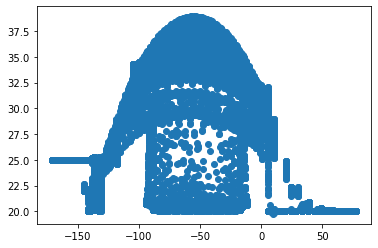

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x, heat)

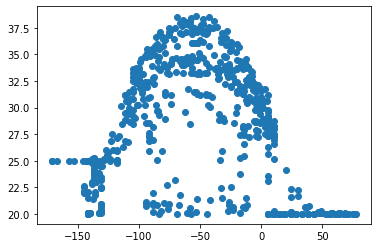

In [22]:
plt.scatter(x[::20], heat[::20])

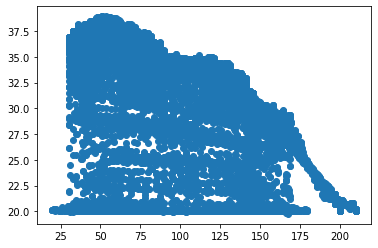

In [23]:
plt.scatter(y, heat)

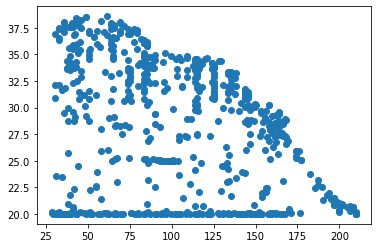

In [24]:
plt.scatter(y[::20], heat[::20])

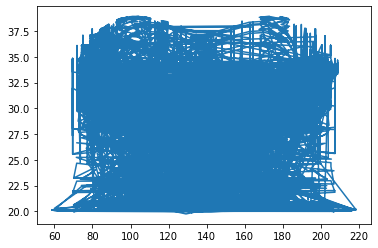

In [25]:
plt.plot(z, heat)

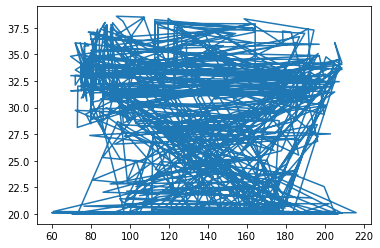

In [26]:
plt.plot(z[::20], heat[::20])

In [ ]:
# Subsample the data
subsampled_data = data_motor[np.random.choice(data_motor.shape[0], size=1200, replace=False)]

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=3)
pca_data = pca.fit_transform(subsampled_data)

# Perform t-SNE to further reduce the dimensionality and preserve topology
tsne = TSNE(n_components=2, perplexity=30)
reduced_data = tsne.fit_transform(pca_data)

In [19]:
print(reduced_data)

NameError: name 'reduced_data' is not defined

In [22]:
import numpy as np
from scipy.spatial import ConvexHull

# Load your 4D dataset into Python
#data = np.loadtxt('your_data_file.txt')

# Compute the convex hull of the dataset
hull = ConvexHull(data_motor)

# Extract the vertices of the boundary facets
boundary_points = np.unique(hull.vertices)

# Print the boundary points
print("Boundary points:")
for i in boundary_points:
    print(data_motor[i])


Boundary points:
[-141.17556763   99.4969635   216.98291016   20.1896    ]
[-139.67556763   99.4969635   218.48291016   20.1896    ]
[-105.17556      32.91571426  124.23291016   33.7639    ]
[-105.17556      32.91571426  122.73291016   33.7564    ]
[-105.17556      32.91571426  154.23291016   33.8408    ]
[-105.17556      32.91571426  152.73291016   33.8377    ]
[-105.17556      35.99057007  112.73291016   34.2701    ]
[-105.17556      35.99057007  164.23291016   34.3465    ]
[-105.17556      63.7469635    79.89057159   34.2607    ]
[-105.17556      63.7469635   197.07525635   34.3326    ]
[-105.17556      65.2469635    79.89057159   34.2499    ]
[-105.17556      65.2469635   197.07525635   34.342     ]
[-105.17556      73.7469635    74.97651672   33.6058    ]
[-105.17556      73.7469635   201.98930359   33.7046    ]
[-105.17556      75.2469635    74.97651672   33.6044    ]
[-105.17556      75.2469635   201.98930359   33.6913    ]
[-105.17556     83.7469635   71.9016571   32.8015   ]
[